In [1]:
import numpy as np
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# -------------------------------------
# Generate simple synthetic data
# -------------------------------------
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# -------------------------------------
# Ridge Regression
# -------------------------------------
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

ridge_pred = ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)

print("Ridge Coefficient:", ridge.coef_)
print("Ridge Intercept:", ridge.intercept_)
print("Ridge MSE:", ridge_mse)

# -------------------------------------
# Lasso Regression
# -------------------------------------
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

lasso_pred = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)

print("Lasso Coefficient:", lasso.coef_)
print("Lasso Intercept:", lasso.intercept_)
print("Lasso MSE:", lasso_mse)


Ridge Coefficient: [2.66984795]
Ridge Intercept: [4.22614732]
Ridge MSE: 1.1735333720041272
Lasso Coefficient: [2.46078813]
Lasso Intercept: [4.42495745]
Lasso MSE: 1.2102272739277389


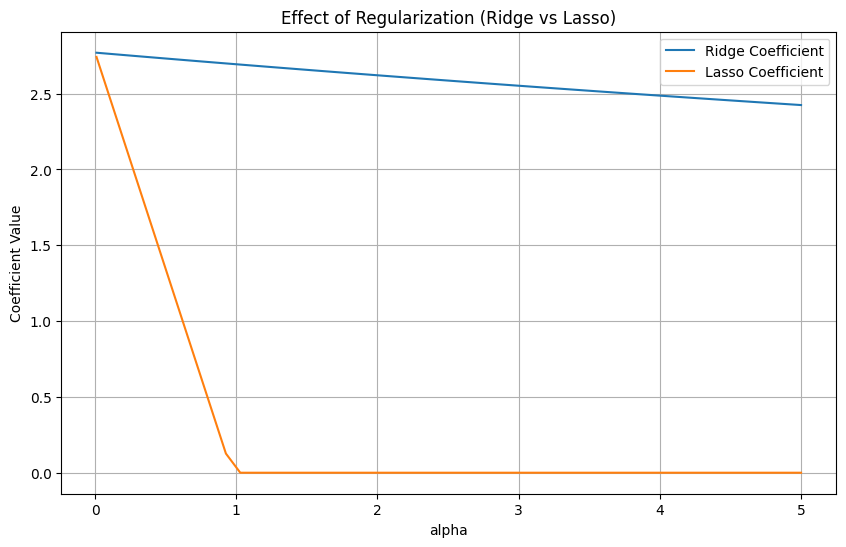

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso

# Data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

alphas = np.linspace(0.01, 5, 50)

ridge_coefs = []
lasso_coefs = []

for a in alphas:
    ridge = Ridge(alpha=a).fit(X, y)
    lasso = Lasso(alpha=a).fit(X, y)

    ridge_coefs.append(ridge.coef_[0])   # FIXED
    lasso_coefs.append(lasso.coef_[0])   # FIXED

# Plot
plt.figure(figsize=(10, 6))
plt.plot(alphas, ridge_coefs, label="Ridge Coefficient")
plt.plot(alphas, lasso_coefs, label="Lasso Coefficient")
plt.xlabel("alpha")
plt.ylabel("Coefficient Value")
plt.title("Effect of Regularization (Ridge vs Lasso)")
plt.legend()
plt.grid(True)
plt.show()
